In [1]:
!nvidia-smi

Fri Jun 30 04:42:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Home

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOV8

In [3]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

# Testing installed Model

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 60.6MB/s]

2023-06-30 04:43:21.709781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 04:43:23.254722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 107MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 61.0ms
Speed: 0.6ms pre-process, 61.0ms inference, 309.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


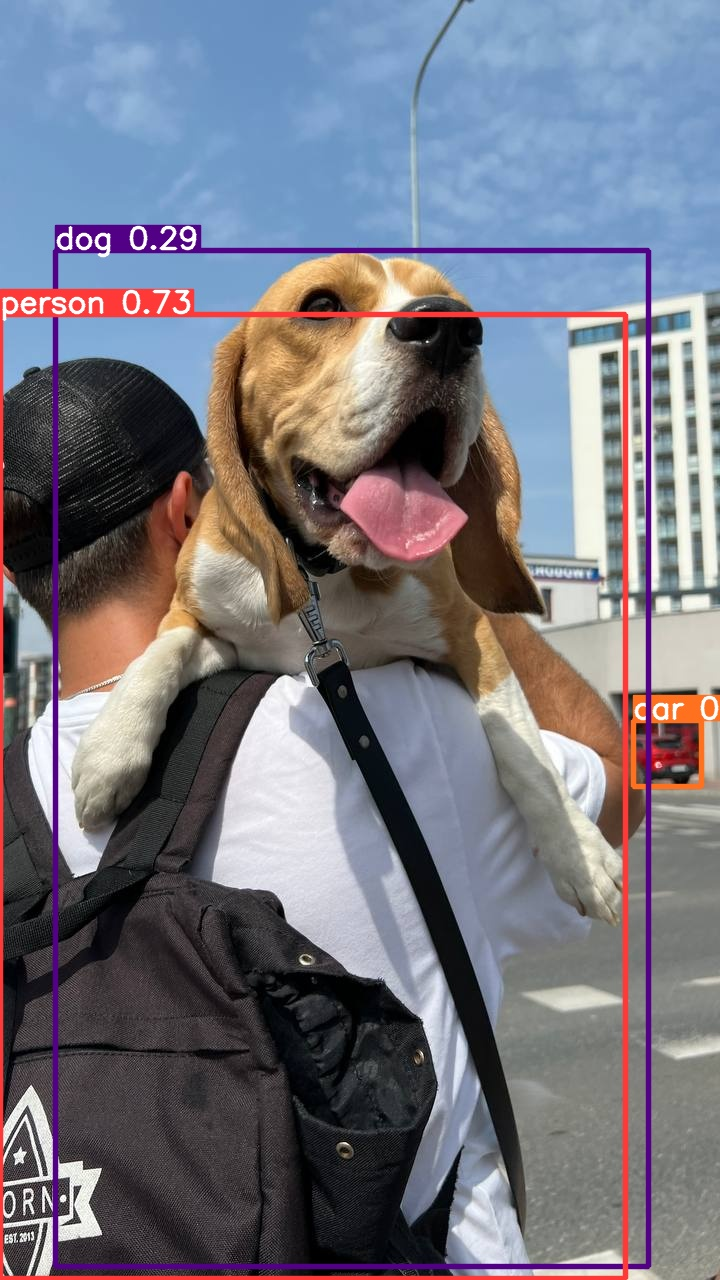

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Load Dataset

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("#####################").project("***************")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=a1298a5b4a4a96510820d70600b2cabf0e887cef44406e1be813f709bf861dcd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Waste-detection2-1 in yolov8:: 100%|██████████| 15394/15394 [00:03<00:00, 4125.70it/s]


# Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=35 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 174MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Waste-detection2-1/data.yaml, epochs=35, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

# Checking

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch10276.jpg
confusion_matrix.png				    train_batch10277.jpg
events.out.tfevents.1688100371.462dddc963d8.1999.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch10275.jpg				    weights


/content


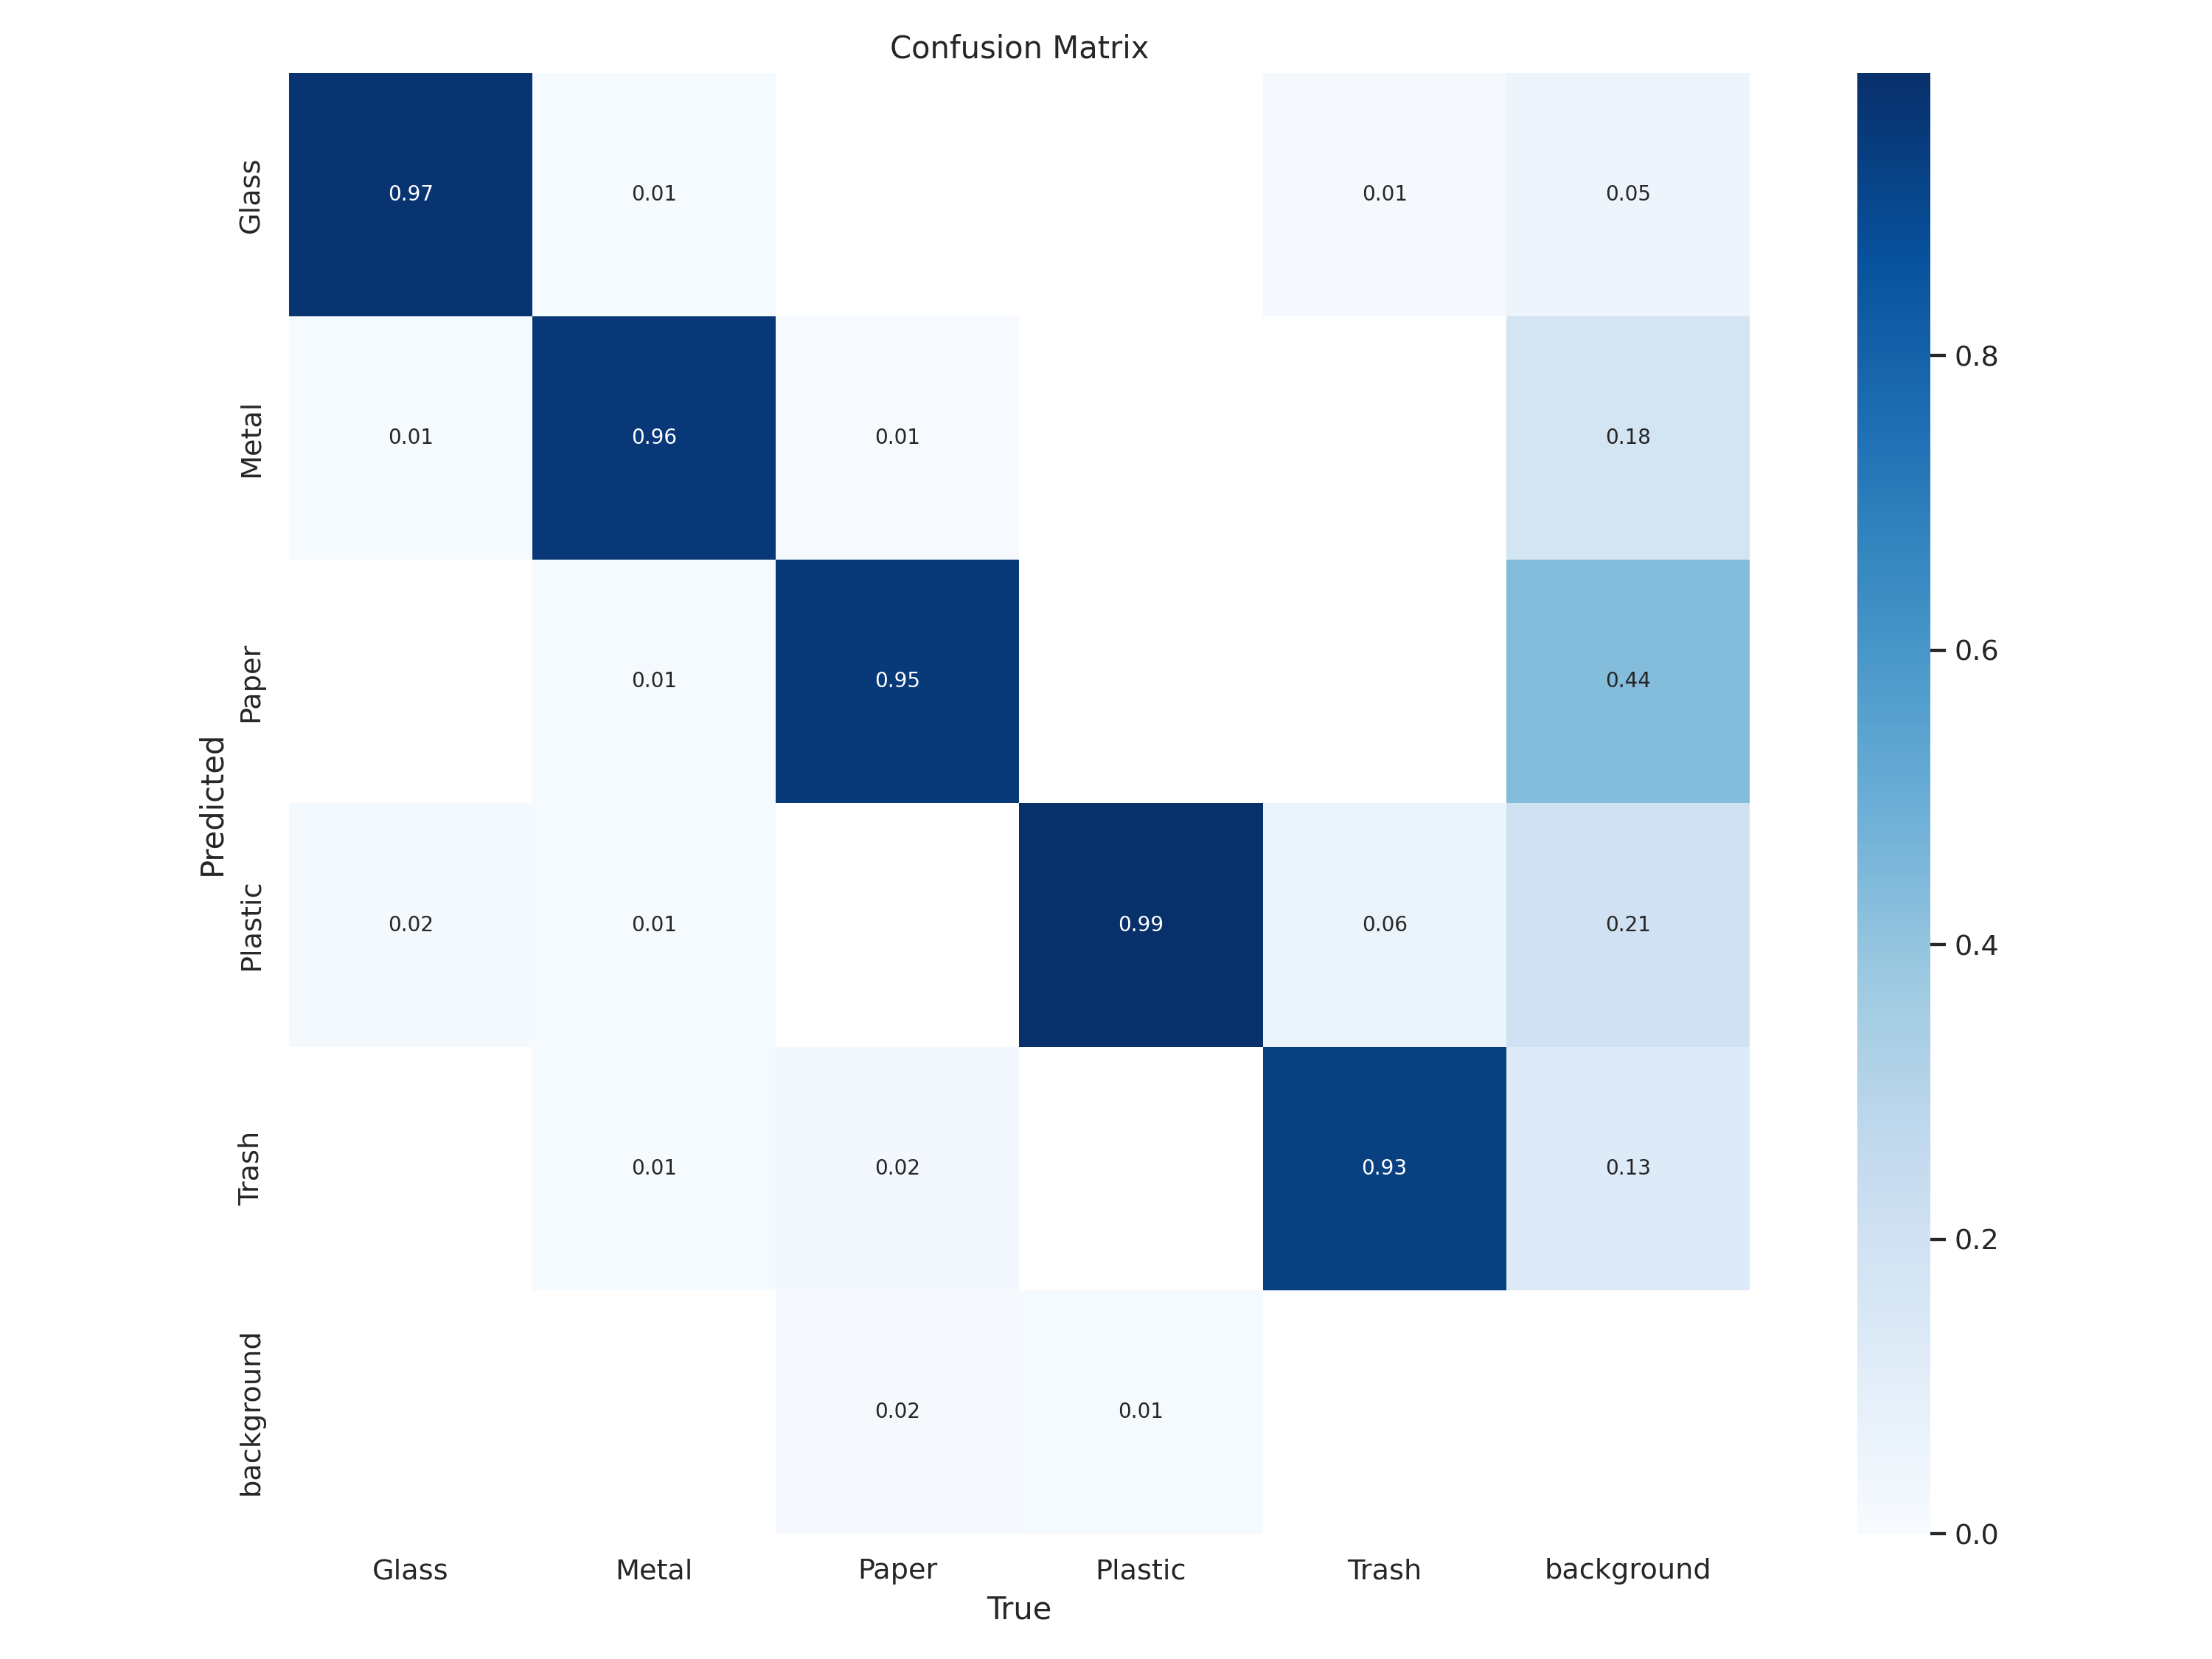

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


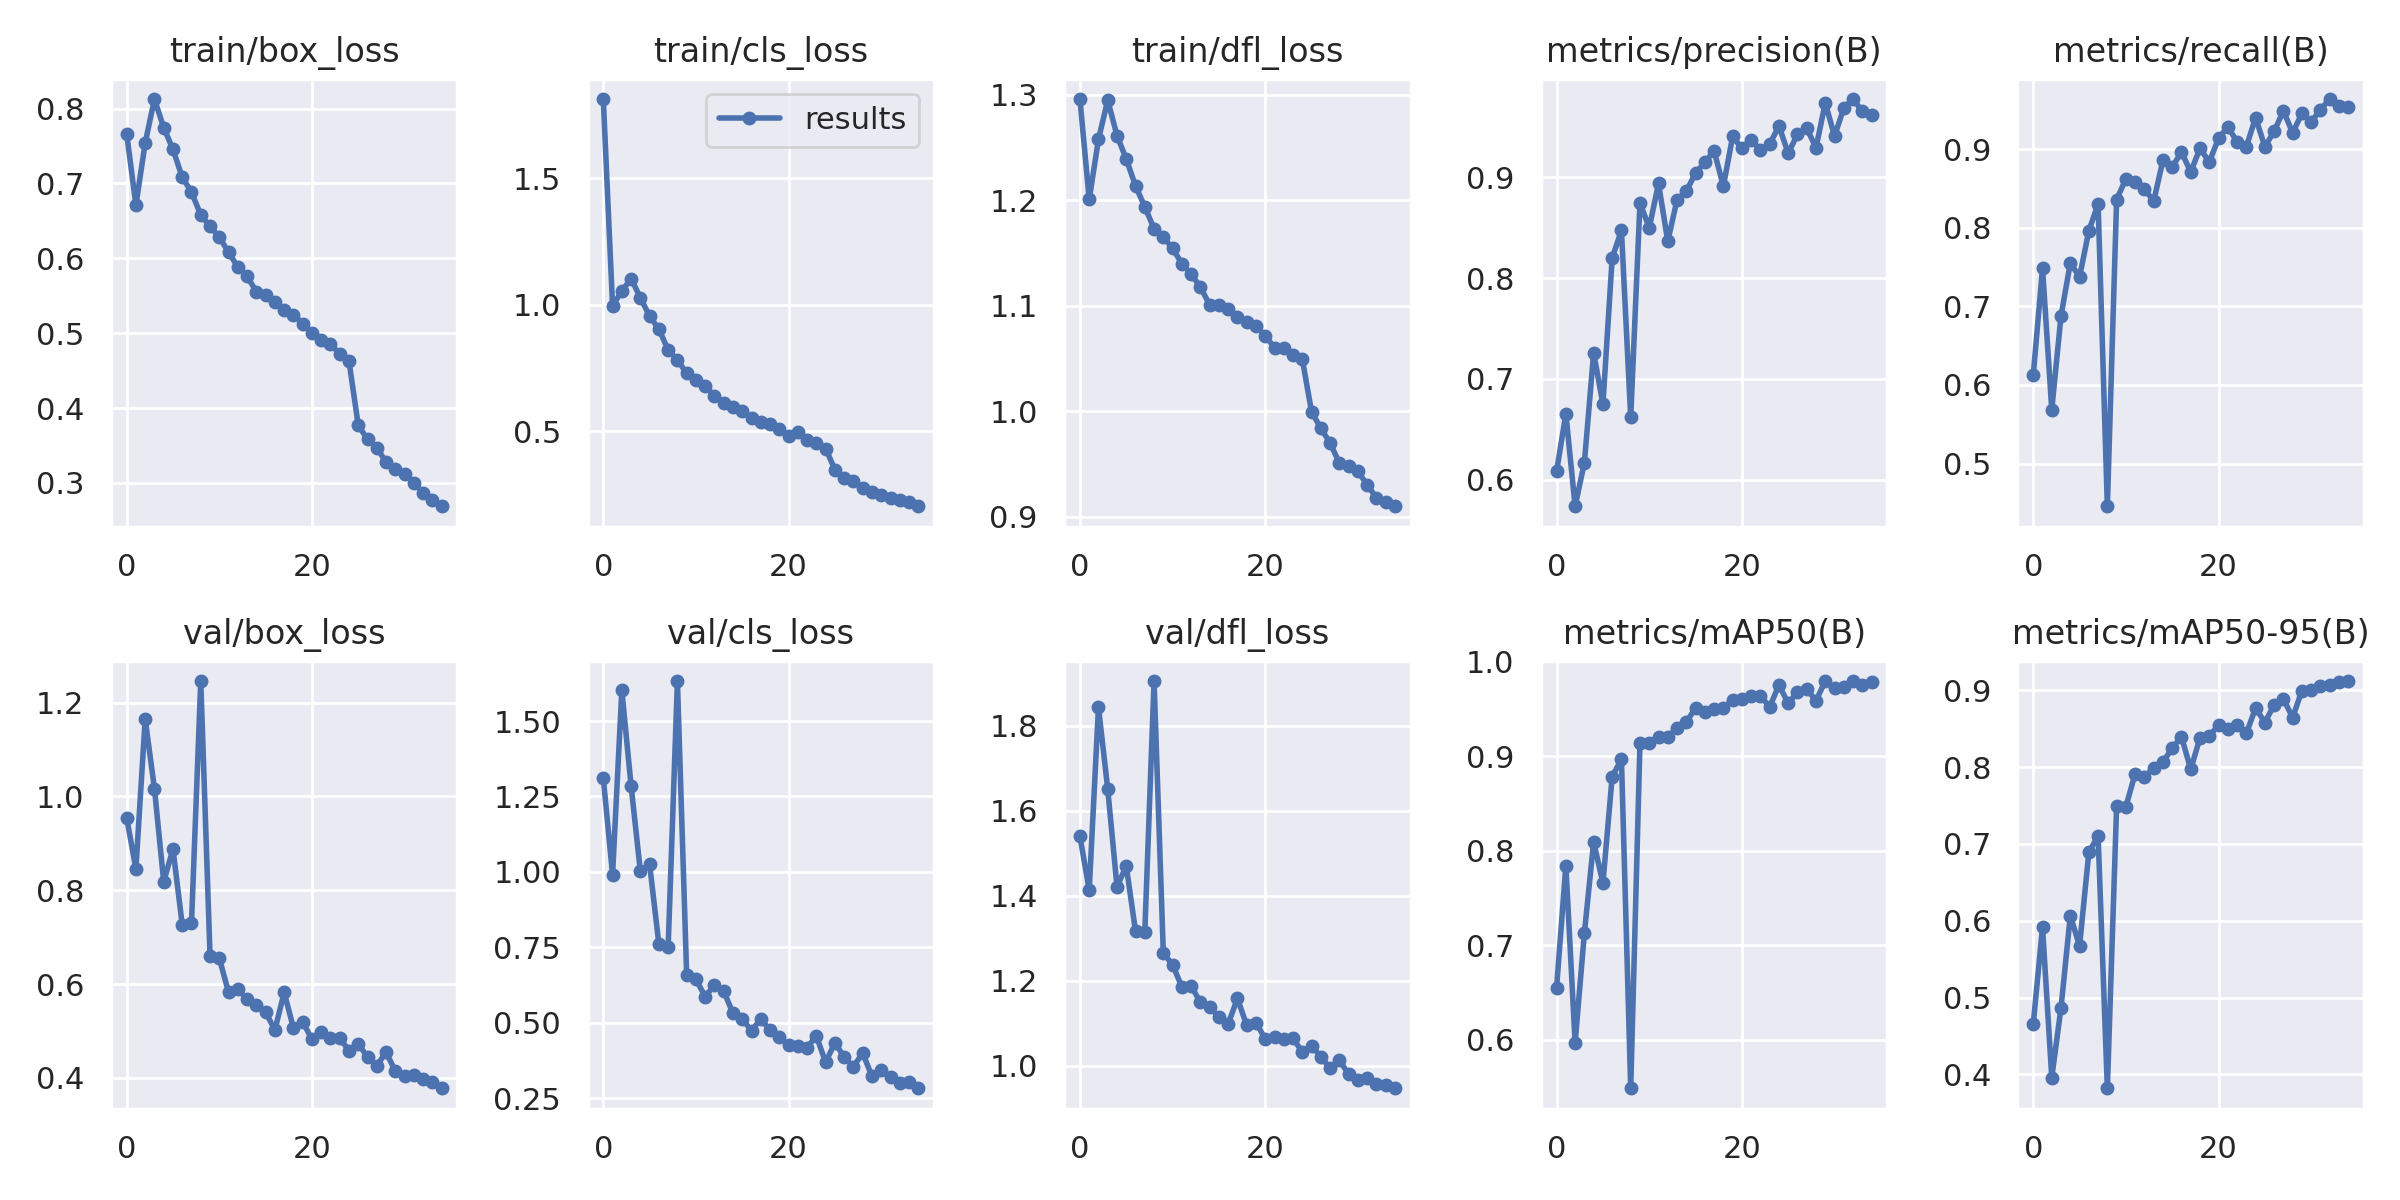

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


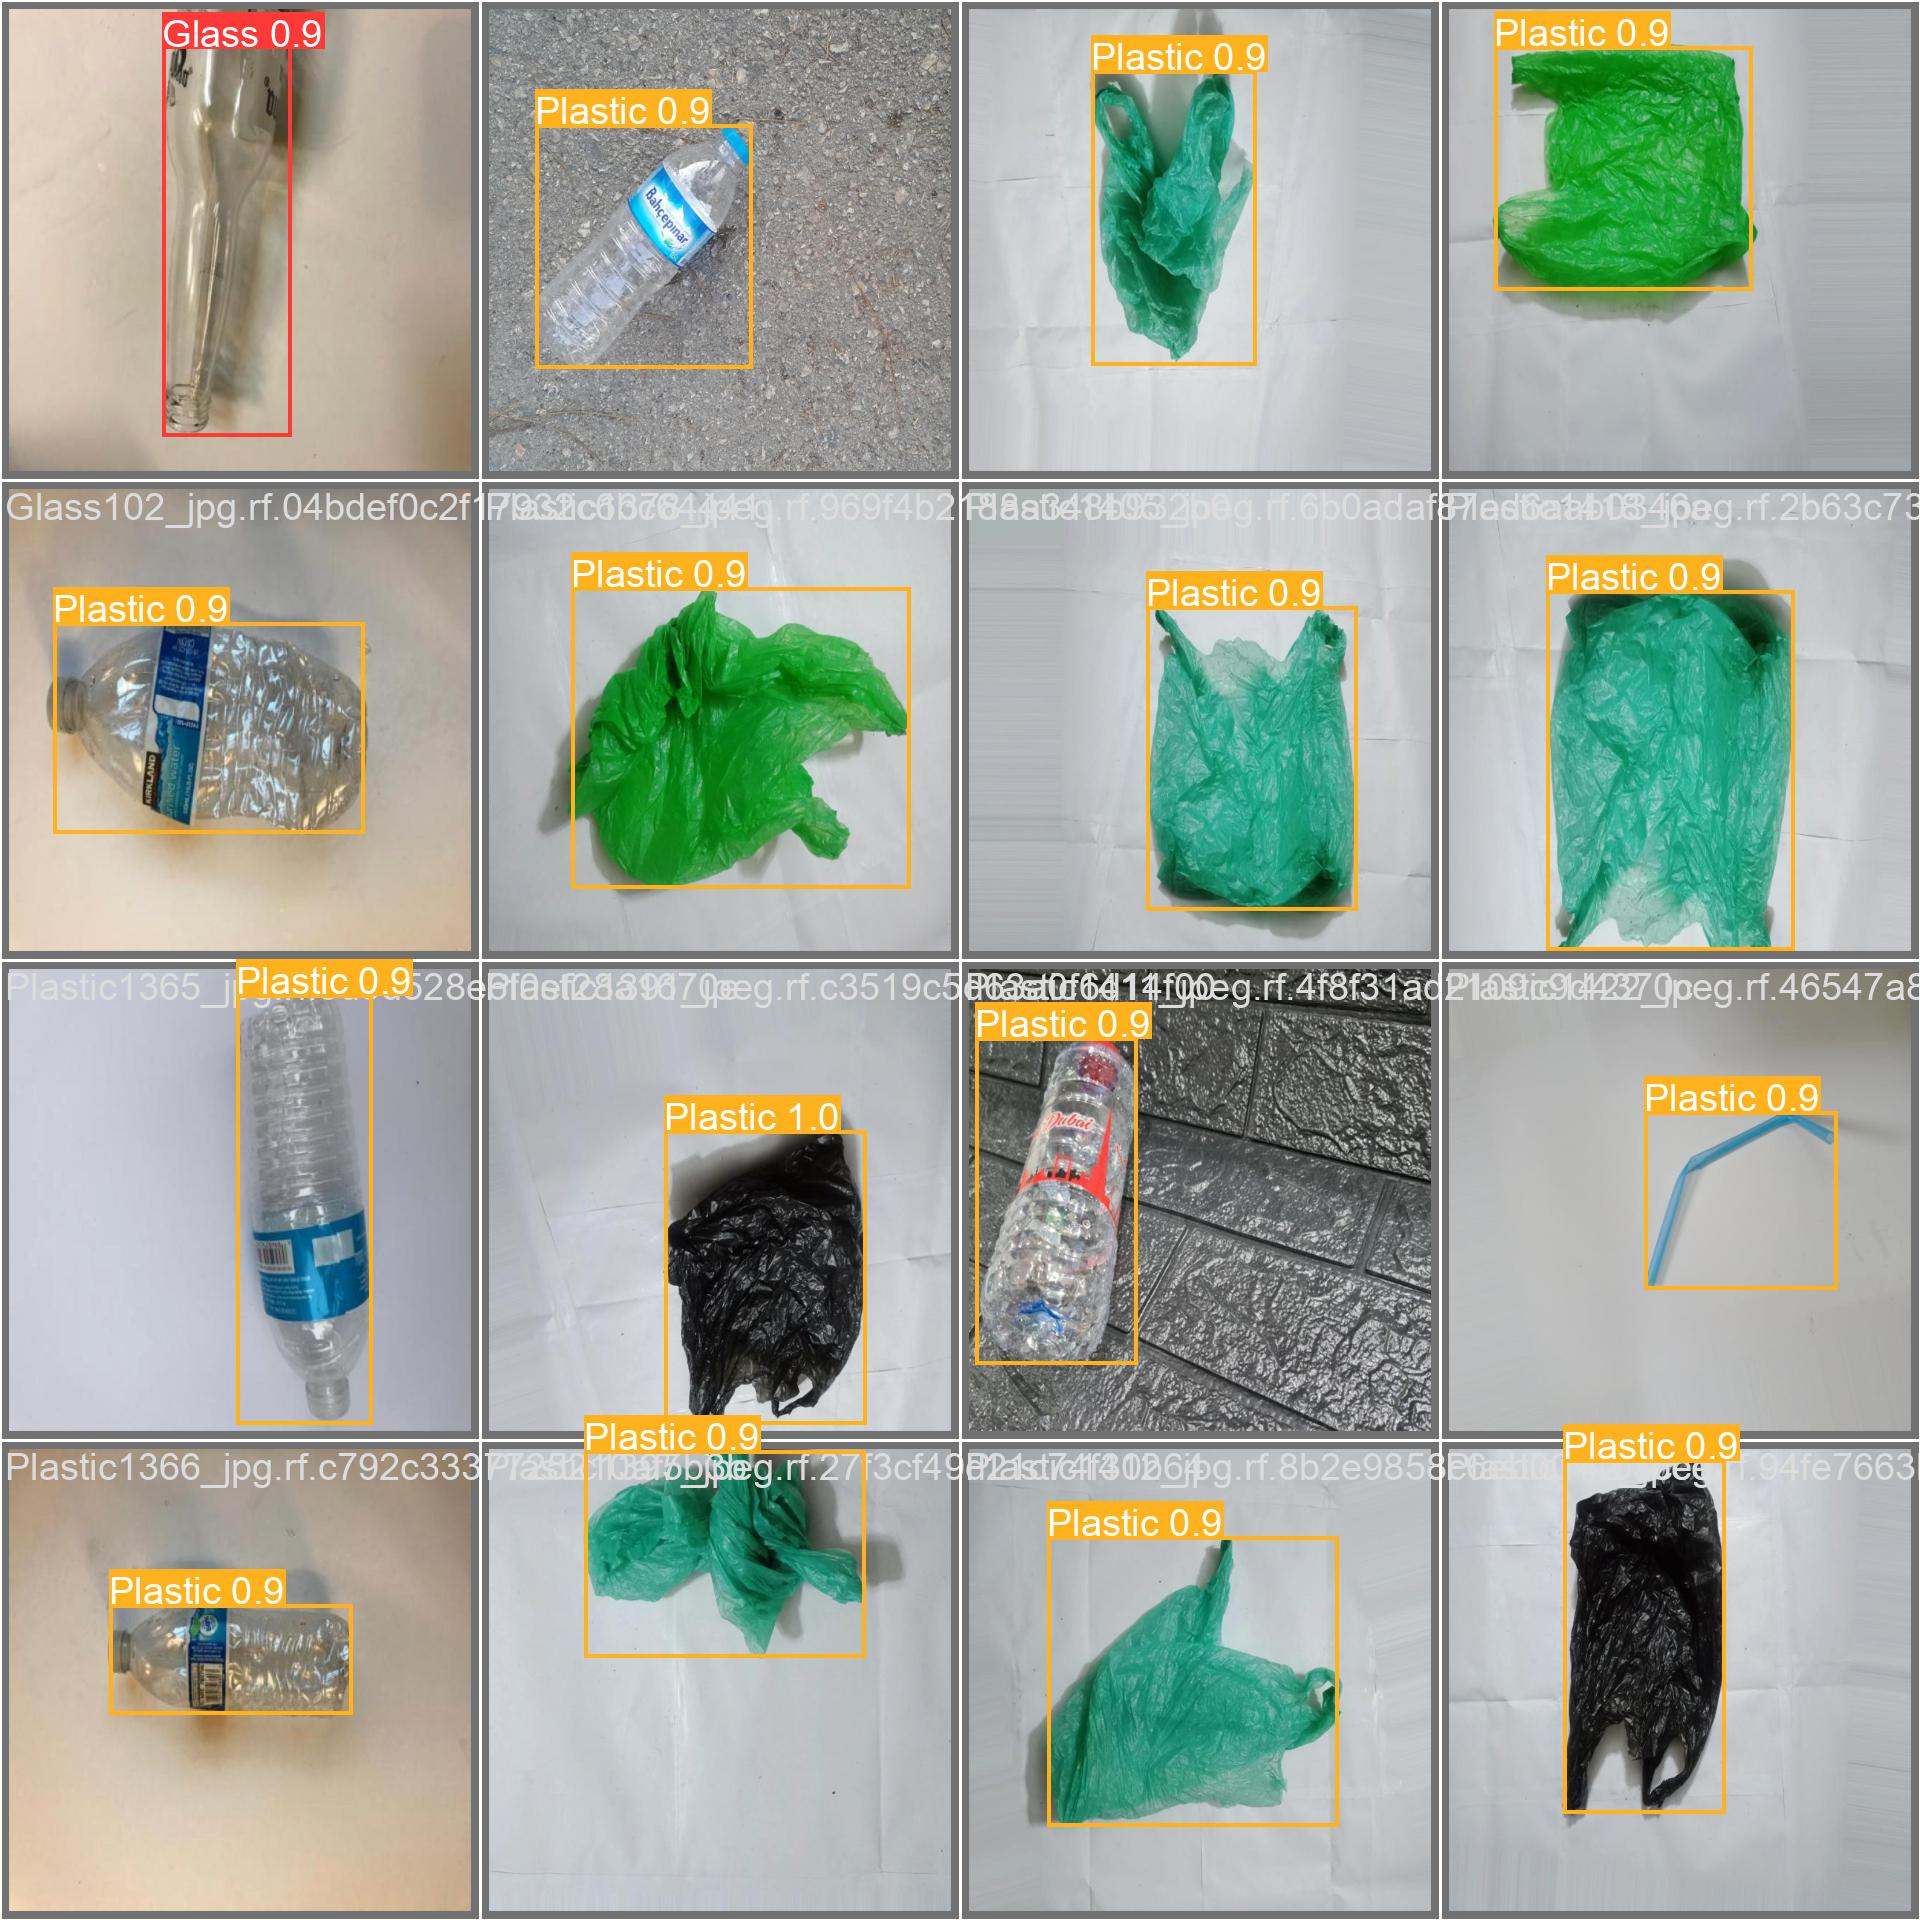

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-30 07:57:26.848133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 07:57:27.732217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Waste-detection2-1/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:16<00:00,  2.45it/s]
                   all        637        673      0.961      0.953      0.978      0.913
                 Glass        6

# Interference with Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.75 source={dataset.location}/test/images save=True

/content
2023-06-30 08:06:52.408665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 08:06:53.528244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/493 /content/datasets/Waste-detection2-1/test/images/Glass11_jpg.rf.979e6fea507e6261b24a3cd8a14362eb.jpg: 800x800 1 Glass, 24.6ms
image 2/493 /content/datasets/Waste-detection2-1/test/images/Glass121_jpg.rf.cf555dd825f6828e115be99f53de732c.jpg: 800x800 1 Glass, 24.7ms
image 3/493 /content/datasets/Waste-detection2-1/test/images/Glass123_jpg.rf.77dce48c3fda120ba9ee726870bb9c51.

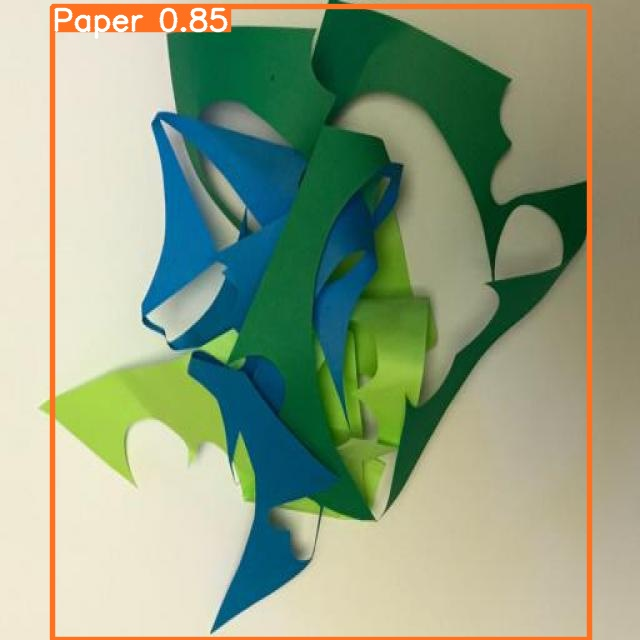

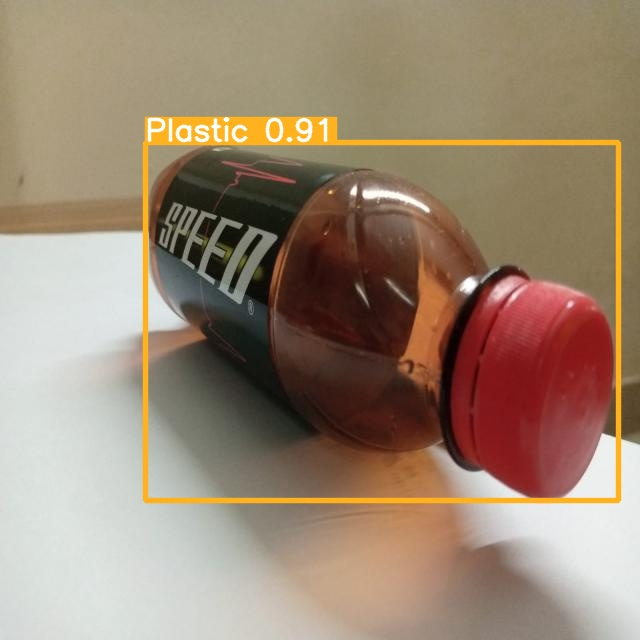

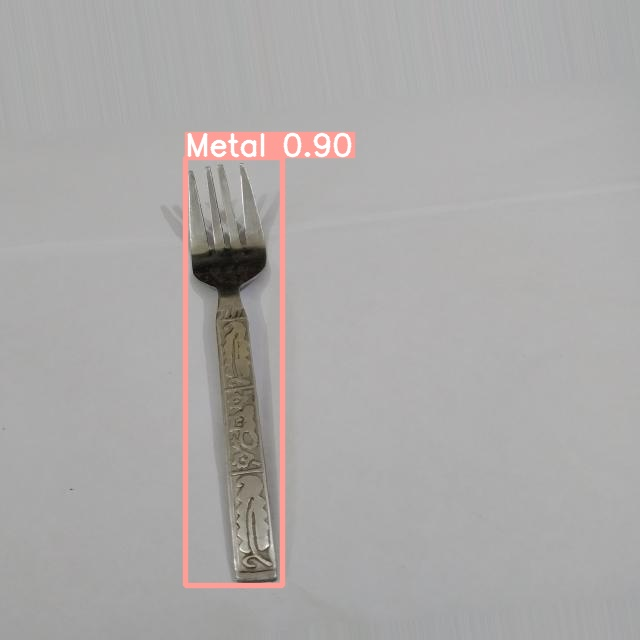

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Donload Files from Drive

In [23]:
!zip -r /content/V8_File1.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/Paper387_jpg.rf.41cca898a89677de3fa08e43e6903040.jpg (deflated 8%)
  adding: content/runs/detect/predict3/Plastic472_jpeg.rf.c28506c8a76fc85c326e145021c19e5f.jpg (deflated 7%)
  adding: content/runs/detect/predict3/Metal641_jpeg.rf.2c14f84342ba31188b63c32486aa6a4a.jpg (deflated 14%)
  adding: content/runs/detect/predict3/Plastic809_jpg.rf.e3b8465577a27e1110a78d73f15fcdc1.jpg (deflated 21%)
  adding: content/runs/detect/predict3/Glass46_jpg.rf.8eb555bdc831f6fb556fbf038f3997ec.jpg (deflated 10%)
  adding: content/runs/detect/predict3/Plastic874_jpg.rf.a8f0e7840d6895f0451d14cec56c7569.jpg (deflated 13%)
  adding: content/runs/detect/predict3/Plastic1253_jpg.rf.965ed66d7ae2532b2287aec323939090.jpg (deflated 9%)
  adding: content/runs/detect/predict3/Metal409_jpg.rf.8b949b50f5af9934b5618712b9d8a97d.jpg (deflated 7%)
  addin

In [24]:
from google.colab import files
files.download("/content/V8_File1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>